# Критерии Стьюдента

In [1]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Treatment effects of methylphenidate

В рамках исследования эффективности препарата метилфенидат 24 пациента с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест.

Требуется оценить эффект применения препарата.

Pearson D.A, Santos C.W., Casat C.D., et al. (2004). Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD. Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685.

In [3]:
data = pd.read_csv('ADHD.txt', sep = ' ', header = 0)
data.columns = ['Placebo', 'Methylphenidate']

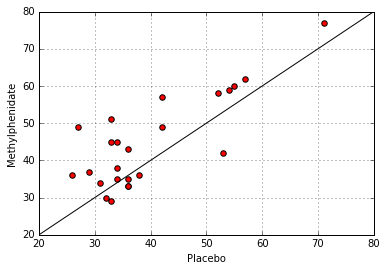

In [4]:
data.plot.scatter('Placebo', 'Methylphenidate', c = 'r', s = 30)
pylab.grid()
pylab.plot(range(100), c = 'black')
pylab.xlim((20, 80))
pylab.ylim((20, 80))
pylab.show()

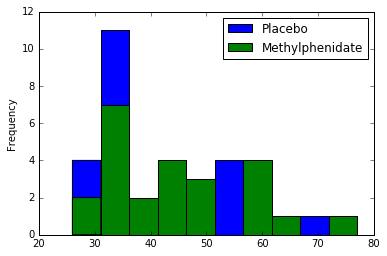

In [5]:
data.plot.hist()
pylab.show()

## Одновыборочный критерий Стьюдента

Исходя из того, что способность к подавлению испульсивных поведенческих реакций измеряется по шкале [0, 100], можно предположить, что при хорошей калибровке теста средняя способоность к подавлению реакций в популяции составляет 50. Тогда для того, чтобы проверить гипотезу о том, что пациенты в выборке действительно в среднем хуже справляются с подавлением импульсивных реакций (нуждаются в лечении), давайте проверим, что их способность к подавлению реакций отличается от средней (не равна 50). 

$H_0\colon$ среднее значение способности к подавлению испульсивных поведенческих реакций равно 50.

$H_1\colon$ не равно.

In [12]:
stats.ttest_1samp(data.Placebo, 50.0)

Ttest_1sampResult(statistic=-4.4380033419051284, pvalue=0.00018894293251080175)

Итак, для того чтобы воспользоваться одновыборочным тестом Стьюдента, нам понадобится библиотека scipy, воспользуемся модулем stats, функция t-test one sample, одновыборочный t-test Стьюдента. Итак, передаем туда наши данные, это data.Placebo, потому что нас интересуют пациенты до применения препарата, и передаем туда параметр 50 — это то значение, с которым мы сравниваем. Итак, видим, что значение статистики равняется −4,4, и pvalue довольно маленькое. Это позволяет нам уверенно отвергнуть нулевую гипотезу и сказать, что среднее не равно 50.

In [13]:
print ("95%% confidence interval: [%f, %f]" % zconfint(data.Placebo))

95% confidence interval: [35.223273, 44.276727]


 Для того чтобы на это посмотреть, давайте интервально оценим среднее по выборке. Сделаем это с помощью метода zconfint. Ну вот видим, что наш интервал целиком лежит левее 50, что в среднем способность измеряется от 35 до 44 пунктов, что меньше 50. Итак, мы убедились, что действительно наши пациенты нуждаются в некоторой помощи и теперь давайте применим двухвыборочный критерий Стьюдента для независимых выборок, для того чтобы оценить, помогает ли исследуемый препарат.

## Двухвыборочный критерий Стьюдента (независимые выборки)

Для того, чтобы использовать двухвыборочный критерий Стьюдента, убедимся, что распределения в выборках существенно не отличаются от нормальных.

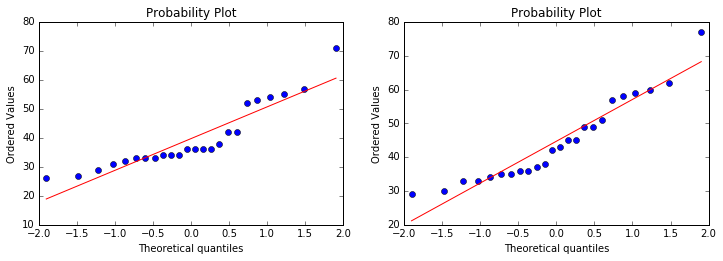

In [14]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(data.Placebo, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(data.Methylphenidate, dist="norm", plot=pylab)
pylab.show()

Для того чтобы использовать двухвыборочный критерий Стьюдента, сначала нужно убедиться, что распределения выборок существенно не отличаются от нормального. Для этого давайте построим Q-Q plot для каждого из распределений: для плацебо и для препарата. Итак, Q-Q plot строится достаточно просто, это делается с помощью функции probplot из модуля stats, и давайте его проанализируем. Итак, в общем-то, мы видим, что и в том и в другом случае наши точки не сильно отличаются от прямой, они лежат не очень далеко. Это дает нам основание предполагать, что данные распределены с некоторым распределением, которое сильно от нормального не отличается. Однако для того чтобы проверить это более строго, давайте воспользуемся критерием Шапиро-Уилка. 

Критерий Шапиро-Уилка:

 $H_0\colon$ способности к подавлению импульсивных реакций распредлены нормально
 
 $H_1\colon$ не нормально.

In [15]:
print ("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Placebo))

Shapiro-Wilk normality test, W-statistic: 0.857487, p-value: 0.003020


In [16]:
print ("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Methylphenidate))

Shapiro-Wilk normality test, W-statistic: 0.916445, p-value: 0.048768


В данном случае нулевая гипотеза будет соответствовать тому, что способность к подавлению реакций распределена нормально, соответственно, альтернатива — распределена по-другому, не нормально. Итак, сначала давайте проверим тест для плацебо. Видим, что pvalue получается 0,003, довольно маленькое значение. И теперь для Шапиро. Видим, что pvalue получается равным 0,05. Ну, в общем-то, значения получаются довольно маленькими, а значит нам придется отвергнуть гипотезу H0. Получается, что данные все-таки не распределены нормально.

С помощью критерия Стьюдента проверим гипотезу о развенстве средних двух выборок.

Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_0\colon$ не одинаковы.

Однако если мы вернемся к предыдущем рисункам, мы видим, что да, действительно, распределение от нормального отличается, но не очень сильно. А мы знаем, что критерий Стьюдента работает в условиях, когда распределение не является нормальным, но существенно от него не отличается. Значит, давайте все-таки попробуем применить критерий Стьюдента. 

Итак, в случае применения критерия Стьюдента имеем следующую нулевую гипотезу: среднее значение способности к подавлению импульсивных поведенческих реакций после применения плацебо и после применения препарата не отличаются. Альтернативная гипотеза: средние по выборкам отличаются. Итак, для того чтобы воспользоваться готовой реализацией двухвыборочного теста Стьюдента в случае независимых выборок, нам снова понадобится библиотека scipy, модуль stats. В данном случае мы используем функцию ttest ind, от слова independent. Итак, в метод мы передаем данные, связанные с одной выборкой, с другой выборкой, а также указываем параметр equal var (equal variance) равняется false. Потому что у нас нет данных о том, что дисперсии одинаковые

In [18]:
scipy.stats.ttest_ind(data.Placebo, data.Methylphenidate, equal_var = False)

Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.15329199774047089)

давайте посчитаем t-test и увидим, что значение статистики равняется −1,45 и pvalue равняется 0,15, то есть pvalue достаточно большое, а значит, мы не можем отвергнуть нулевую гипотезу. Получается, что вероятнее всего, препарат все-таки помогает. Давайте интервально оценим разность средних по этим двум выборкам. Для этого воспользуемся методом CompareMeans. Видим, что доверительный интервал получился следующим: от −2 до 12. То есть фактически наше среднее все-таки скорее больше, чем 0, однако 0 лежит в этом интервале. Получается, что однозначно сказать все-таки довольно сложно

In [20]:
cm = CompareMeans(DescrStatsW(data.Methylphenidate), DescrStatsW(data.Placebo))
print ("95%% confidence interval: [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

95% confidence interval: [-1.915927, 11.832593]


## Двухвыборочный критерий Стьюдента (зависимые выборки)

Для того, чтобы использовать критерий Стьюдента для связанных выборок, давайте проверим, что распределение попарных разностей существенно не отличается от нормального.

In [ ]:
так, давайте вспомним то, что на самом деле мы с вами рассматриваем 24 пациента, каждый из которых одну неделю применял препарат, а другую неделю применял плацебо. Получается, что выборка, связанная с применением плацебо и выборка, связанная с применением препарата являются зависимыми. Таким образом, в данной задаче мы можем использовать двухвыборочный критерий Стьюдента для связанных выборок. Вот давайте его применим. Для того чтобы этот критерий использовать, нам также нужно убедиться в нормальности данных. Давайте рассчитаем попарные разности и убедимся, что распределение попарных разностей существенно не отличается от нормального. Давайте снова нарисуем Q-Q plot, сделаем это с помощью метода probplot, и убедимся, что наши точки находятся очень близко к прямой, значит распределение, скорее всего, похоже на нормальное. Снова применим критерий Шапиро-Уилка, в данном случае нулевая гипотеза — попарные разности распределены нормально, альтернатива — это не так. Итак, применяем критерий с помощью метода stats.shapiro, передаем туда разности и смотрим на значения. 

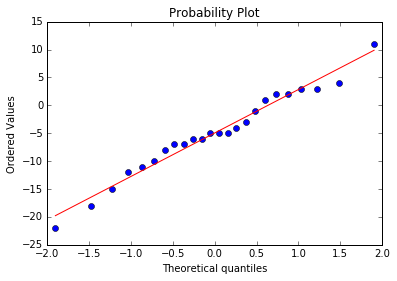

In [22]:
stats.probplot(data.Placebo - data.Methylphenidate, dist = "norm", plot = pylab)
pylab.show()

Критерий Шапиро-Уилка:

$H_0\colon$ попарные разности распределены нормально.

$H_1\colon$ не нормально.

In [9]:
print ("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Methylphenidate - data.Placebo))

Shapiro-Wilk normality test, W-statistic: 0.979806, p-value: 0.892254


Снова применим критерий Шапиро-Уилка, в данном случае нулевая гипотеза — попарные разности распределены нормально, альтернатива — это не так. Итак, применяем критерий с помощью метода stats.shapiro, передаем туда разности и смотрим на значения. Видим, что pvalue получилось большое, 0,89, а значит, нулевую гипотезу отвергать нельзя, данные распределены нормально. Отлично, можно смело применять критерий Стьюдента. 

Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_1\colon$ не одинаковы.

In [23]:
stats.ttest_rel(data.Methylphenidate, data.Placebo)

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

 значение статистики составляет 3,2, pvalue — всего лишь 0,004. Это значит, что мы можем уверенно откинуть нулевую гипотезу, отвергнуть ее, и прийти к выводу, что все-таки способности к подавлениям импульсивных поведенческих реакций отличаются. 

In [10]:
print ("95%% confidence interval: [%f, %f]" % DescrStatsW(data.Methylphenidate - data.Placebo).tconfint_mean())

95% confidence interval: [1.775236, 8.141431]


Давайте в данном случае оценим доверительный интервал разности, однако будем помнить, что мы работаем со связанными выборками, поэтому будем использовать соответствующую функциональность, и увидим, что весь доверительный интервал находится правее нуля, а значит, что применение препарата все-таки способствует росту способности подавления импульсивных поведенческих реакций. Видим, что разность в среднем изменяется от 2 до 8.